<a href="https://colab.research.google.com/github/Whimsical-Maverick/Mask-Detector/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/FaceMaskDetection/Covid-19-PIS.v2i.folder.zip" -d "/content/drive/MyDrive/FaceMaskDetection/"

Archive:  /content/drive/MyDrive/FaceMaskDetection/Covid-19-PIS.v2i.folder.zip
 extracting: /content/drive/MyDrive/FaceMaskDetection/README.dataset.txt  
 extracting: /content/drive/MyDrive/FaceMaskDetection/README.roboflow.txt  
   creating: /content/drive/MyDrive/FaceMaskDetection/train/
   creating: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/
 extracting: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/0-with-mask_jpg.rf.2dd114e4f143ba8bf221a0377529b7a5.jpg  
 extracting: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/1-with-mask_jpg.rf.55ddc814fc4bd585eb7c22fd3547147e.jpg  
 extracting: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/10-with-mask_jpg.rf.6d6b6e28f0165e6984436cd1e6136f78.jpg  
 extracting: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/100-with-mask_jpg.rf.b2eb265c05204fbe784034ed05ab76c2.jpg  
 extracting: /content/drive/MyDrive/FaceMaskDetection/train/with_mask/101-with-mask_jpg.rf.9c83e9895874ce3eb0ac4e1b12c45488

In [ ]:
train_dir="/content/drive/MyDrive/FaceMaskDetection/train"

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42,
    labels="inferred",
    shuffle=True
)

Found 1279 files belonging to 2 classes.
Using 1024 files for training.


In [ ]:
val_dataset=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    image_size=(224,224),
    batch_size=32,
    labels="inferred",
    shuffle=False
)

Found 1279 files belonging to 2 classes.
Using 255 files for validation.


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [ ]:
vgg.trainable=False

In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
MachineModel=tf.keras.Sequential([
    # tf.keras.layers.Input((224, 224, 3)),
    # tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.1, fill_mode='nearest'),
    # tf.keras.layers.RandomTranslation(0.1, 0.2, fill_mode='nearest'),
    # tf.keras.layers.RandomZoom(0.1, fill_mode='nearest'),
    # tf.keras.layers.Rescaling(1./255),
    # tf.keras.layers.Lambda(preprocess_input),  # Apply the VGG16 preprocessing
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
MachineModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
  MachineModel.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      loss='SparseCategoricalCrossentropy',
      metrics=['accuracy']
  )

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>0.95 and logs['val_accuracy']>0.95):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training=True

In [ ]:
history=MachineModel.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[MyCustomCallback()]
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 790ms/step - accuracy: 0.8660 - loss: 2.0301 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9871 - loss: 0.2496
Reached 90% accuracy so cancelling training!
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9871 - loss: 0.2477 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
import matplotlib.pyplot as plt

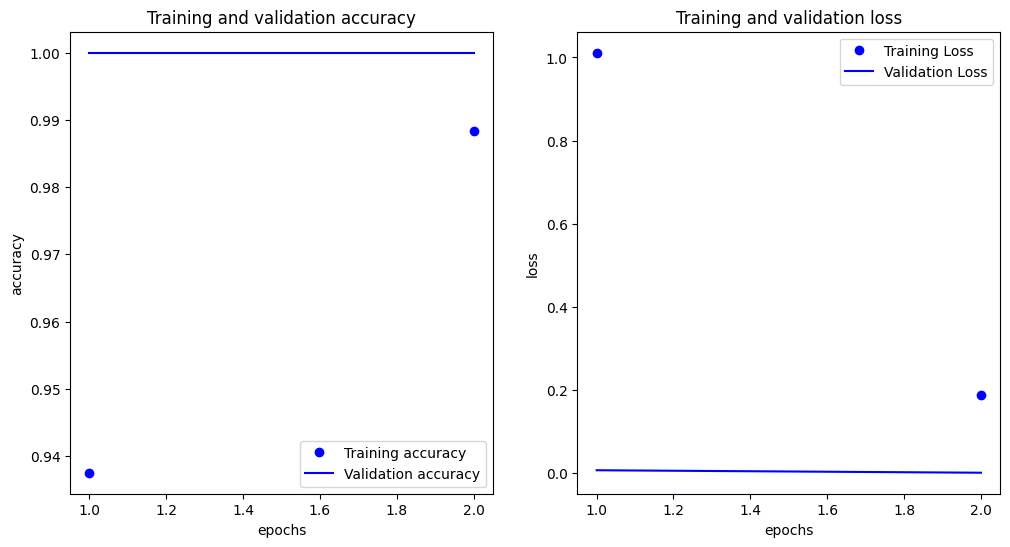

In [ ]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc)+1)

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

plot_loss_acc(history)

In [ ]:
MachineModel.save(r"/content/drive/MyDrive/FaceMaskDetection/MaskDetection.h5")

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import tensorflow as tf
import cv2
labels_dict = {0: 'Danger', 1: 'Safe'}
model=tf.keras.models.load_model(r"/content/drive/MyDrive/FaceMaskDetection/MaskDetection.h5")
faces=cv2.CascadeClassifier(r"/content/drive/MyDrive/FaceMaskDetection/haarcascade_frontalface_default.xml")
video =cv2.VideoCapture(0)
while True:
  ret,frame=video.read()
  if not ret or frame is None:
    print("Error: Failed to capture frame.")
    break
  facedetect=faces.detectMultiScale(frame,1.3,3)
  for x,y,w,h in facedetect:
    face_img=frame[y:y+h,x:x+w]
    face_img=cv2.resize(face_img,(224,224))
    normalised_face_img=face_img/255
    reshaped_face_img=tf.reshape(normalised_face_img,[1,224,224,3])
    result=model.predict(reshaped_face_img)
    label=result.argmax()
    if label==0:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
      cv2.rectangle(frame, (x, y-40), (x+w, y), (50, 50, 255), -1)
      cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    else:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
      cv2.rectangle(frame, (x, y-40), (x+w, y), (50, 50, 255), -1)
      cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

  cv2_imshow(frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
video.release()
cv2.destroyAllWindows()

Error: Failed to capture frame.
